In [9]:
import os
import json
import pandas as pd
from collections import defaultdict
from collections import Counter

In [2]:
! pip install pipreqs

  Using cached yarg-0.1.9-py2.py3-none-any.whl (19 kB)


In [5]:
! python -m  pipreqs.pipreqs --encoding utf-8  .

INFO: Successfully saved requirements file in .\requirements.txt


# ROC  curve

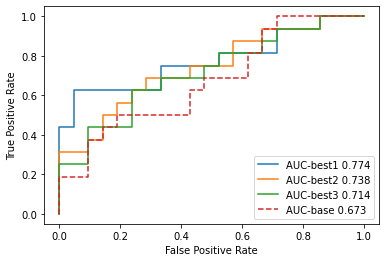

In [27]:
# ROC score/curve for different combo
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

def read(path,filename,metric):
    result=[]
    with open(path,'r') as f:
        dict_ = {}
        for line in f:
            token, score = line.split('\t')
            field = "_".join([filename,metric])
            dict_[token]=float(score[:-1])
        dict_ = {k: v for k, v in sorted(dict_.items(), key=lambda item: item[1], reverse=True)}
        result = [{'task':filename, 'metric':metric, 'token':k, 'score':v, 'rank':i} for i, (k,v) in enumerate(dict_.items())]
        
    return result

def ave(results):
    df = pd.DataFrame(results)
    df['score'] = df['score'].astype(float)

    res = pd.DataFrame(df.groupby(["token"]).mean()).to_dict()

    dict_ = {k: v for k, v in sorted(res['score'].items(), key=lambda item: item[1], reverse=True)}
    return dict_


# best model for prt 
# read in gold scores
gold_scores = read("../test_data_truth/task1/english_nopos.txt","gold","gold")
prt_nli =  read("../results/PRT/snli",'snli','prt')
prt_local_sst =  read("../results/PRT/sst2_local_finetune",'local_sst2','prt')
prt_local_pos =  read("../results/PRT/pos_local_finetune",'local_pos','prt')
prt_sst2_pfeiffer = read("../results/PRT/sst2_pfeiffer", "sst2_pfeiffer", "prt")
prt_ner = read("../results/PRT/ner", "ner", "prt")
prt_read_compre = read("../results/PRT/read_compre", "read_compre", "prt")
prt_histbert_10 = read("../results/PRT/histbert-10", "histbert10", "prt")

prt_bb =  read("../results/PRT/bert_base",'bert_base','prt')

prt_best1 = ave(prt_nli+prt_local_sst+prt_local_pos)
prt_best2 =  ave(prt_nli+prt_local_sst+prt_local_pos+prt_sst2_pfeiffer+prt_ner)
prt_best3 =  ave(prt_bb+prt_local_sst+prt_nli+prt_sst2_pfeiffer+prt_ner)
prt_best4 =  ave(prt_local_sst+prt_nli+prt_sst2_pfeiffer+prt_local_pos)
prt_best5 =  ave(prt_local_sst+prt_nli+prt_sst2_pfeiffer+prt_read_compre+prt_histbert_10+prt_local_pos)


prt_base = {item["token"]:item["score"] for item in prt_bb}

y_true, y_pred_best1,y_pred_best2,y_pred_best3,y_pred_best4, y_pred_best5, y_pred_base =[],[],[],[],[],[],[]
for item in gold_scores:
    y_true.append(item['score'])
    y_pred_best1.append(prt_best1[item['token']])
    y_pred_best2.append(prt_best2[item['token']])
    y_pred_best3.append(prt_best3[item['token']])
    y_pred_best4.append(prt_best4[item['token']])
    y_pred_best5.append(prt_best5[item['token']])
    y_pred_base.append(prt_base[item['token']])


fpr_best1, tpr_best1, thresholds_best1 = metrics.roc_curve(y_true, y_pred_best1)
fpr_best2, tpr_best2, thresholds_best2 = metrics.roc_curve(y_true, y_pred_best2)
fpr_best3, tpr_best3, thresholds_best3 = metrics.roc_curve(y_true, y_pred_best3)
fpr_best4, tpr_best4, thresholds_best4 = metrics.roc_curve(y_true, y_pred_best4)
fpr_best5, tpr_best5, thresholds_best5 = metrics.roc_curve(y_true, y_pred_best5)
auc_best1= metrics.roc_auc_score(y_true, y_pred_best1)
auc_best2= metrics.roc_auc_score(y_true, y_pred_best2)
auc_best3= metrics.roc_auc_score(y_true, y_pred_best3)
auc_best4= metrics.roc_auc_score(y_true, y_pred_best4)
auc_best5= metrics.roc_auc_score(y_true, y_pred_best5)


fpr_base, tpr_base, thresholds_base = metrics.roc_curve(y_true, y_pred_base)
auc_base = metrics.roc_auc_score(y_true, y_pred_base)

#create ROC curve
plt.plot(fpr_best1,tpr_best1,label="AUC-best1 "+str(round(auc_best1,3)))
plt.plot(fpr_best2,tpr_best2,label="AUC-best2 "+str(round(auc_best2,3)))
plt.plot(fpr_best3,tpr_best3,label="AUC-best3 "+str(round(auc_best3,3)))
#plt.plot(fpr_best4,tpr_best4,label="AUC-best4 "+str(round(auc_best4,3)))
#plt.plot(fpr_best5,tpr_best5,label="AUC-best5 "+str(round(auc_best5,3)))
plt.plot(fpr_base,tpr_base,label="AUC-base "+str(round(auc_base,3)),linestyle='dashed')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

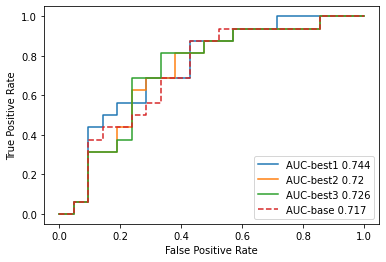

In [28]:
# for apd best 

apd_bb =  read("../results/APD/bert_base",'bb','apd')
apd_sst2 = read("../results/APD/sst2",'sst2','apd')
apd_nli =  read("../results/APD/snli",'nli','apd')
apd_textualsim =  read("../results/APD/textual_sim",'texutalsim','apd')
apd_errordetect =  read("../results/APD/error_detect",'errordetect','apd')
apd_local_pos =  read("../results/APD/pos_local_finetune",'local_pos','apd')
apd_base = {item["token"]:item["score"] for item in apd_bb}

prt_best1 = ave(apd_nli+apd_textualsim+apd_errordetect+apd_local_pos+apd_bb)
prt_best2 =  ave(apd_bb+apd_sst2+apd_errordetect+apd_local_pos)
prt_best3 =  ave(apd_sst2+apd_textualsim+apd_errordetect)
prt_best4 =  ave(apd_bb+apd_sst2+apd_textualsim+apd_errordetect)
prt_best5 =  ave(apd_bb+apd_textualsim+apd_errordetect)
prt_test = ave(apd_local_pos+apd_nli)

prt_base = {item["token"]:item["score"] for item in apd_bb}

y_true, y_pred_best1,y_pred_best2,y_pred_best3,y_pred_best4, y_pred_best5, y_pred_base =[],[],[],[],[],[],[]
for item in gold_scores:
    y_true.append(item['score'])
    y_pred_best1.append(prt_best1[item['token']])
    y_pred_best2.append(prt_best2[item['token']])
    y_pred_best3.append(prt_best3[item['token']])
    y_pred_best4.append(prt_best4[item['token']])
    y_pred_best5.append(prt_best5[item['token']])
    y_pred_base.append(prt_base[item['token']])


fpr_best1, tpr_best1, thresholds_best1 = metrics.roc_curve(y_true, y_pred_best1)
fpr_best2, tpr_best2, thresholds_best2 = metrics.roc_curve(y_true, y_pred_best2)
fpr_best3, tpr_best3, thresholds_best3 = metrics.roc_curve(y_true, y_pred_best3)
fpr_best4, tpr_best4, thresholds_best4 = metrics.roc_curve(y_true, y_pred_best4)
fpr_best5, tpr_best5, thresholds_best5 = metrics.roc_curve(y_true, y_pred_best5)
auc_best1= metrics.roc_auc_score(y_true, y_pred_best1)
auc_best2= metrics.roc_auc_score(y_true, y_pred_best2)
auc_best3= metrics.roc_auc_score(y_true, y_pred_best3)
auc_best4= metrics.roc_auc_score(y_true, y_pred_best4)
auc_best5= metrics.roc_auc_score(y_true, y_pred_best5)


fpr_base, tpr_base, thresholds_base = metrics.roc_curve(y_true, y_pred_base)
auc_base = metrics.roc_auc_score(y_true, y_pred_base)

#create ROC curve
plt.plot(fpr_best1,tpr_best1,label="AUC-best1 "+str(round(auc_best1,3)))
plt.plot(fpr_best2,tpr_best2,label="AUC-best2 "+str(round(auc_best2,3)))
plt.plot(fpr_best3,tpr_best3,label="AUC-best3 "+str(round(auc_best3,3)))
#plt.plot(fpr_best4,tpr_best4,label="AUC-best4 "+str(round(auc_best4,3)))
#plt.plot(fpr_best5,tpr_best5,label="AUC-best5 "+str(round(auc_best5,3)))
plt.plot(fpr_base,tpr_base,label="AUC-base "+str(round(auc_base,3)),linestyle='dashed')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Looking into PRT/APD scores

In [16]:
# 1. create distribution
import os
import pandas as pd
import numpy as np
from scipy import stats
def read(path, filename, metric):
    with open(path,'r') as f:
        dict_ = {}
        for line in f:
            token, score = line.split('\t')
            dict_[token]=float(score[:-1])
        dict_ = {k: v for k, v in sorted(dict_.items(), key=lambda item: item[1], reverse=True)}
        result = [{'task':filename, 'metric':metric, 'token':k, 'score':v, 'rank':i} for i, (k,v) in enumerate(dict_.items())]
        
    return result

def aggregate():
    results=[]
    metrics = ['PRT','APD']
    for metric in metrics:
        for filename in os.listdir(f"../results/{metric}"):
            if filename!='discovery_noun' and filename!='discovery_verb' and filename!='gold.txt' and filename!='bert_base': 
                print(filename)
                path = f"../results/{metric}/{filename}"
                results += read(path,filename,metric)
    return results
        
all_results = aggregate()

df = pd.DataFrame(all_results)
df_prt = df[df['metric']=='PRT']
df_apd = df[df['metric']=='APD']

prt_scores = df_prt.score.tolist()
apd_scores = df_apd.score.tolist()

k1, p1 = stats.normaltest(prt_scores)
k2, p2 = stats.normaltest(apd_scores)
print(k1,p1)
print(k2,p2)
#  reject the null hypothesis that values are from normal distributions

error_detect
histbert
histbert-10
histbert-5
histbert-full
ling_accept
ner
phrase_chunk
pos
pos_local_finetune
read_compre
sem_tag
snli
sst2
sst2_hously
sst2_local_finetune
sst2_pfeiffer
textual_sim
error_detect
histbert
histbert-10
histbert-5
histbert-full
ling_accept
ner
phrase_chunk
pos
pos_local_finetune
read_compre
sem_tag
snli
sst2
sst2_hously
sst2_local_finetune
sst2_pfeiffer
textual_sim
561.6588660777488 1.0897499937478553e-122
56.760268824488705 4.727855876560677e-13


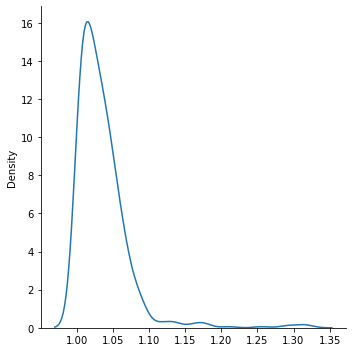

In [5]:
# plot distribution
import seaborn as sns
sns.displot(prt_scores,  kind="kde")

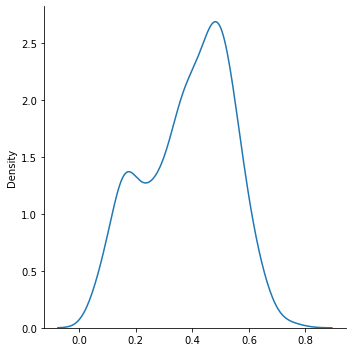

In [6]:
sns.displot(apd_scores,  kind="kde")

# generate p-value for individual rank task

In [10]:
import numpy as np
from docopt import docopt
from scipy.stats import spearmanr
import os


def get_ys(model_answers, true_answers):
    """
    :param model_answers: path to tab-separated answer file (lemma + "\t" + score)
    :param true_answers: path to tab-separated gold answer file (lemma + "\t" + score)
    :return: a numpy array for the model scores, and one for the true scores
    """
    y_hat_tmp = {}
    errors = 0
    with open(model_answers, 'r', encoding='utf-8') as f_in:
        for line in f_in:
            lemma, score = line.strip().split('\t')
            #print(lemma,score)
            if score == 'nan':
                errors += 1
            y_hat_tmp[lemma] = score
    if errors:
        print('Found {} NaN predictions'.format(errors))
    y_hat, y = [], []
    

    with open(true_answers, 'r', encoding='utf-8') as f_in:
        for line in f_in:
            lemma, score = line.strip().split('\t')
            #print(lemma,score)
            if y_hat_tmp[lemma] != 'nan':
                y.append(float(score))
                y_hat.append(float(y_hat_tmp[lemma]))

    return np.array(y_hat), np.array(y)


def eval_task2(model_answers, true_answers):
    """
    Computes the Spearman's correlation coefficient against the true rank as annotated by humans
    :param model_answers: path to tab-separated answer file (lemma + "\t" + score)
    :param true_answers: path to tab-separated gold answer file (lemma + "\t" + score)
    :return: (Spearman's correlation coefficient, p-value)
    """

    y_hat, y = get_ys(model_answers, true_answers)
    assert len(y_hat) == len(y), str(len(y_hat)) + ' ' + str(len(y))

    y_hat_ = []
    y_ = []
    cnt = 0
    for a, b in zip(y_hat, y):
        if a != 1:
            y_hat_.append(a)
            y_.append(b)
        else:
            cnt += 1

    #print('{} words with JSD = 1.'.format(cnt))

    r, p = spearmanr(y_hat_, y_)
    return r, p


    

In [23]:
# randomly sampling instead of generating values
import random
import numpy as np
import numpy as np
from sklearn import metrics

best_model_score_prt = [0.423,  0.264,0.218,0.427,0.205,0.352,0.364,0.076,0.277,0.416,0.265,0.422, 0.435,0.123,0.391,0.378]
best_model_score_apd = [ 0.706, 0.441,0.285,0.634, 0.205,0.593,0.622,0.185,0.087,0.636,0.255,0.608,0.627,0.210,0.459,0.694]
def baseline(scores, iterations, bert_base_file, best_score):
    eval_scores = []
    with open(bert_base_file,'r') as f:
        token_list, score_list=[],[]
        base_dict = {}
        for line in f:
            token, score = line.split('\t')
            token_list.append(token)
            score_list.append(float(score[:-1]))
    
    for i in range(iterations):
        random_scores = random.sample(scores, 37)
        with open("tem_score","w") as f:
            for tok, sc in zip(token_list,random_scores):
                f.write(tok+'\t'+str(sc)+'\n')
        r, p = eval_task2("tem_score", "../test_data_truth/task2/english_nopos.txt")
        
        eval_scores.append(r)
        
    for bs in best_score:
        percentage = sum([1 for sc in eval_scores if sc>bs])/len(eval_scores)
        print(sum(eval_scores)/len(eval_scores), np.std(eval_scores), percentage)
    
    return #

                              
baseline(prt_scores, 100000, '../results/PRT/bert_base', best_model_score_prt)
        

0.0006785464568741521 0.1663945185026389 0.00458
0.0006785464568741521 0.1663945185026389 0.05739
0.0006785464568741521 0.1663945185026389 0.09839
0.0006785464568741521 0.1663945185026389 0.00418
0.0006785464568741521 0.1663945185026389 0.11316
0.0006785464568741521 0.1663945185026389 0.01653
0.0006785464568741521 0.1663945185026389 0.01374
0.0006785464568741521 0.1663945185026389 0.32637
0.0006785464568741521 0.1663945185026389 0.04858
0.0006785464568741521 0.1663945185026389 0.0052
0.0006785464568741521 0.1663945185026389 0.05668
0.0006785464568741521 0.1663945185026389 0.00464
0.0006785464568741521 0.1663945185026389 0.00354
0.0006785464568741521 0.1663945185026389 0.23479
0.0006785464568741521 0.1663945185026389 0.00843
0.0006785464568741521 0.1663945185026389 0.0106


In [24]:
baseline(apd_scores,100000, '../results/APD/bert_base',best_model_score_apd)

0.0008159843628948438 0.16665700248290669 0.0
0.0008159843628948438 0.16665700248290669 0.0035
0.0008159843628948438 0.16665700248290669 0.04326
0.0008159843628948438 0.16665700248290669 2e-05
0.0008159843628948438 0.16665700248290669 0.11234
0.0008159843628948438 0.16665700248290669 6e-05
0.0008159843628948438 0.16665700248290669 4e-05
0.0008159843628948438 0.16665700248290669 0.13719
0.0008159843628948438 0.16665700248290669 0.30671
0.0008159843628948438 0.16665700248290669 1e-05
0.0008159843628948438 0.16665700248290669 0.06382
0.0008159843628948438 0.16665700248290669 5e-05
0.0008159843628948438 0.16665700248290669 3e-05
0.0008159843628948438 0.16665700248290669 0.10702
0.0008159843628948438 0.16665700248290669 0.00247
0.0008159843628948438 0.16665700248290669 0.0


# generate p-value for individual auc task

In [25]:
best_model_score_prt = [0.673,  0.657,0.688,0.646,0.634,0.634,0.628,0.622,0.634,0.670,0.649,0.658,0.682,0.673,0.631,0.661]
best_model_score_apd = [0.717,0.659,0.604,0.714,0.536,0.670,0.676,0.622,0.643,0.696,0.631,0.664,0.685,0.417,0.613,0.741]
def baseline(scores, iterations, bert_base_file, best_score):
    true = read("../test_data_truth/task1/english_nopos.txt","gold","gold")
    true_ = {item['token']: item['score'] for item in true}
    y_true = np.array(list(true_.values()))
    eval_scores = []
    with open(bert_base_file,'r') as f:
        token_list, score_list=[],[]
        base_dict = {}
        for line in f:
            token, score = line.split('\t')
            base_dict[token]=float(score[:-1])
        score_list = [base_dict[k] for k, v in true_.items()]
    
    for i in range(iterations):
        random_scores = random.sample(scores, 37)
        y_true = np.array(list(true_.values()))
        y_pred = np.array(random_scores)
                
        fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
             
        eval_scores.append(metrics.auc(fpr, tpr))
        
    for bs in best_score:
        percentage = sum([1 for sc in eval_scores if sc>bs])/len(eval_scores)
        print(sum(eval_scores)/len(eval_scores), np.std(eval_scores), percentage)
    
    return 
                              
baseline(prt_scores, 100000, '../results/PRT/bert_base', best_model_score_prt)

0.5005637499999942 0.09704625434514595 0.03709
0.5005637499999942 0.09704625434514595 0.05547
0.5005637499999942 0.09704625434514595 0.02622
0.5005637499999942 0.09704625434514595 0.06586
0.5005637499999942 0.09704625434514595 0.0824
0.5005637499999942 0.09704625434514595 0.0824
0.5005637499999942 0.09704625434514595 0.09247
0.5005637499999942 0.09704625434514595 0.10818
0.5005637499999942 0.09704625434514595 0.0824
0.5005637499999942 0.09704625434514595 0.03986
0.5005637499999942 0.09704625434514595 0.06229
0.5005637499999942 0.09704625434514595 0.05215
0.5005637499999942 0.09704625434514595 0.03035
0.5005637499999942 0.09704625434514595 0.03709
0.5005637499999942 0.09704625434514595 0.08716
0.5005637499999942 0.09704625434514595 0.04893


In [26]:
baseline(apd_scores,100000, '../results/APD/bert_base',best_model_score_apd)

0.5000701190476151 0.09729307076140163 0.01315
0.5000701190476151 0.09729307076140163 0.05129
0.5000701190476151 0.09729307076140163 0.14784
0.5000701190476151 0.09729307076140163 0.01432
0.5000701190476151 0.09729307076140163 0.35213
0.5000701190476151 0.09729307076140163 0.03934
0.5000701190476151 0.09729307076140163 0.03438
0.5000701190476151 0.09729307076140163 0.10916
0.5000701190476151 0.09729307076140163 0.0699
0.5000701190476151 0.09729307076140163 0.02252
0.5000701190476151 0.09729307076140163 0.08886
0.5000701190476151 0.09729307076140163 0.04521
0.5000701190476151 0.09729307076140163 0.02795
0.5000701190476151 0.09729307076140163 0.79675
0.5000701190476151 0.09729307076140163 0.12771
0.5000701190476151 0.09729307076140163 0.0066


# best combination ranking



APD: best 10

('bert_base', 'snli', 'textual_sim', 'error_detect', 'pos_local_finetune') 0.7234572406776069

('bert_base', 'sst2', 'error_detect', 'pos_local_finetune') 0.7223901945999114

('sst2', 'textual_sim', 'error_detect') 0.7216788305481142

('bert_base', 'sst2', 'textual_sim', 'error_detect') 0.7215602698728146

('bert_base', 'textual_sim', 'error_detect') 0.7213231485222157

('bert_base', 'sst2', 'textual_sim', 'error_detect', 'pos_local_finetune') 0.7213231485222157

('bert_base', 'snli', 'error_detect') 0.7212045878469161

('bert_base', 'textual_sim', 'pos_local_finetune') 0.7212045878469161

('bert_base', 'snli', 'error_detect', 'pos_local_finetune') 0.7206117844704186

('bert_base', 'snli', 'textual_sim', 'error_detect') 0.7203746631198197

APD: worst 10

('pos_local_finetune', 'sst2_local_finetune') -0.2140020189156146

('sst2_local_finetune',) -0.2104451986566293

('pos_local_finetune',) 0.08737921769573849

('pos_local_finetune', 'pos', 'sst2_local_finetune') 0.09271444808421642

('pos', 'sst2_local_finetune') 0.12188037420789576

('sst2_local_finetune', 'histbert-full') 0.13041674282946045

('pos_local_finetune', 'pos', 'sst2_local_finetune', 'phrase_chunk') 0.13148378890715604

('sst2_local_finetune', 'phrase_chunk') 0.1359890945685374

('pos_local_finetune', 'sst2_local_finetune', 'phrase_chunk') 0.13670045862033445

('pos', 'sst2_local_finetune', 'phrase_chunk') 0.14345841711240645

=======================================================================

PRT best 10

('snli', 'pos_local_finetune', 'sst2_local_finetune') 0.5311518253418026

('snli', 'sst2_pfeiffer', 'pos_local_finetune', 'ner', 'sst2_local_finetune') 0.5149090128257697

('bert_base', 'snli', 'sst2_pfeiffer', 'ner', 'sst2_local_finetune') 0.5031715059711183

('snli', 'sst2_pfeiffer', 'pos_local_finetune', 'sst2_local_finetune') 0.5025787025946208

('snli', 'read_compre', 'sst2_pfeiffer', 'histbert-10', 'pos_local_finetune', 'sst2_local_finetune') 0.5022230205687221

('snli', 'sst2_pfeiffer', 'pos_local_finetune', 'ner') 0.5019858992181231

('bert_base', 'sst2_hously', 'snli', 'read_compre', 'sst2_pfeiffer', 'histbert-10', 'histbert', 'pos_local_finetune', 'sem_tag', 'ner') 0.5009188531404276

('snli', 'read_compre', 'sst2_pfeiffer', 'pos_local_finetune', 'sst2_local_finetune') 0.5002074890886306

('snli', 'read_compre', 'pos_local_finetune', 'sem_tag', 'ner') 0.49937756436153397

('snli', 'read_compre', 'sst2_pfeiffer', 'pos_local_finetune', 'ner', 'sst2_local_finetune') 0.4989033216603359

PRT worst 10

('sst2_local_finetune', 'histbert-full') 0.011737506854651438

('pos_local_finetune', 'sst2_local_finetune', 'histbert-full') 0.01387159901004261

('pos_local_finetune', 'histbert-full') 0.037939416095843045

('histbert-full',) 0.044104571211417525

('ner', 'sst2_local_finetune', 'histbert-full') 0.07421898273749294

('phrase_chunk',) 0.07611595354228509

('pos_local_finetune', 'ner', 'sst2_local_finetune', 'histbert-full') 0.08180686595666155

('sst2_local_finetune', 'phrase_chunk') 0.08773489972163702

('pos_local_finetune', 'ner', 'histbert-full') 0.10160649873167962

('ner', 'histbert-full') 0.10623036506836049




# best combination ranking p value

In [30]:
# randomly sampling instead of generating values
import random
import numpy as np
import numpy as np
from sklearn import metrics

best_model_score_prt = [0.531,  0.515,0.503,0.503,0.502]
best_model_score_apd = [ 0.723, 0.722,0.722,0.721, 0.721]
def baseline(scores, iterations, bert_base_file, best_score):
    eval_scores = []
    with open(bert_base_file,'r') as f:
        token_list, score_list=[],[]
        base_dict = {}
        for line in f:
            token, score = line.split('\t')
            token_list.append(token)
            score_list.append(float(score[:-1]))
            
    for i in range(iterations):
        random_scores = random.sample(scores, 37)
        averaged_scores = [(bb+r)/2 for bb, r in zip(score_list, random_scores)]
        with open("tem_score","w") as f:
            for tok, sc in zip(token_list,random_scores):
                f.write(tok+'\t'+str(sc)+'\n')
        r, p = eval_task2("tem_score", "../test_data_truth/task2/english_nopos.txt")
        
        eval_scores.append(r)
        
    for bs in best_score:
        percentage = sum([1 for sc in eval_scores if sc>bs])/len(eval_scores)
        print(sum(eval_scores)/len(eval_scores), np.std(eval_scores), percentage)
    
    
    return

                              
baseline(prt_scores, 100000, '../results/PRT/bert_base', best_model_score_prt)

4.852332757983329e-05 0.1666425976724507 0.00048
4.852332757983329e-05 0.1666425976724507 0.00063
4.852332757983329e-05 0.1666425976724507 0.00087
4.852332757983329e-05 0.1666425976724507 0.00087
4.852332757983329e-05 0.1666425976724507 0.00091


In [31]:
baseline(apd_scores, 100000, '../results/APD/bert_base', best_model_score_apd)

0.0002395957118925276 0.1668332440587205 0.0
0.0002395957118925276 0.1668332440587205 0.0
0.0002395957118925276 0.1668332440587205 0.0
0.0002395957118925276 0.1668332440587205 0.0
0.0002395957118925276 0.1668332440587205 0.0


# best combination auc

In [32]:
# auc combo
from itertools import combinations

def ave(results, combo):
    df_new = results[results.task.isin(combo)]
    res = df_new.groupby(["token"]).mean().to_dict()
    return res['score']


def read(path,filename,metric):
    with open(path,'r') as f:
        dict_ = {}
        for line in f:
            token, score = line.split('\t')
            dict_[token]=float(score[:-1])
        result = [{'task':filename, 'metric':metric, 'token':k, 'score':v, 'rank':i} for i, (k,v) in enumerate(dict_.items())]
        
    return dict_,result

prt = ["ner", "sst2_hously", "bert_base","sst2_local_finetune","read_compre"]
apd = ["read_compre", "textual_sim","snli","bert_base","sst2_hously"]

def task1_combo(task_list,metric):
    results={}
    all_res=[]
    true,_ = read("../test_data_truth/task1/english_nopos.txt","gold","gold" )
    y_true = np.array(list(true.values()))
    for item in task_list:
       
        all_res+=read(f"../results/{metric}/{item}", item, {metric})[1]

    df = pd.DataFrame(all_res)
    df['score'] = df['score'].astype(float)


    for i in range(4):
        select = list(combinations(task_list,i+2))
        for item in select:
            target_dict = ave(df,item)
            y_pred = np.array([target_dict[k] for k, v in true.items()])
            fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
            results[item] = metrics.auc(fpr, tpr)
    results_ = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}
    return results_
                

task1_combo(prt, "PRT")
        
        

{('ner', 'sst2_hously', 'sst2_local_finetune'): 0.7321428571428572,
 ('ner', 'sst2_local_finetune', 'read_compre'): 0.7202380952380952,
 ('ner',
  'sst2_hously',
  'sst2_local_finetune',
  'read_compre'): 0.7142857142857143,
 ('ner', 'sst2_hously'): 0.7113095238095237,
 ('ner', 'bert_base', 'sst2_local_finetune'): 0.7113095238095237,
 ('sst2_hously', 'sst2_local_finetune', 'read_compre'): 0.7083333333333333,
 ('sst2_hously', 'sst2_local_finetune'): 0.7053571428571429,
 ('ner',
  'sst2_hously',
  'bert_base',
  'sst2_local_finetune'): 0.7053571428571428,
 ('ner', 'bert_base'): 0.7023809523809524,
 ('sst2_local_finetune', 'read_compre'): 0.7023809523809524,
 ('ner', 'sst2_local_finetune'): 0.699404761904762,
 ('ner', 'read_compre'): 0.6964285714285714,
 ('ner', 'sst2_hously', 'bert_base'): 0.6964285714285714,
 ('sst2_hously', 'bert_base', 'sst2_local_finetune'): 0.6964285714285714,
 ('ner',
  'sst2_hously',
  'bert_base',
  'sst2_local_finetune',
  'read_compre'): 0.6934523809523809,
 ('

In [33]:
task1_combo(apd, "APD")

{('textual_sim', 'snli'): 0.7410714285714286,
 ('textual_sim', 'snli', 'bert_base'): 0.7380952380952381,
 ('textual_sim', 'bert_base'): 0.7351190476190476,
 ('read_compre', 'textual_sim', 'bert_base'): 0.7321428571428571,
 ('textual_sim', 'sst2_hously'): 0.7291666666666667,
 ('read_compre', 'textual_sim'): 0.7261904761904763,
 ('read_compre', 'bert_base'): 0.7261904761904762,
 ('snli', 'bert_base'): 0.7232142857142857,
 ('textual_sim', 'bert_base', 'sst2_hously'): 0.7232142857142857,
 ('read_compre', 'textual_sim', 'snli', 'bert_base'): 0.7232142857142857,
 ('read_compre', 'textual_sim', 'snli'): 0.7202380952380953,
 ('read_compre', 'snli'): 0.7202380952380952,
 ('read_compre',
  'textual_sim',
  'bert_base',
  'sst2_hously'): 0.7202380952380952,
 ('read_compre', 'textual_sim', 'snli', 'sst2_hously'): 0.7172619047619048,
 ('textual_sim', 'snli', 'bert_base', 'sst2_hously'): 0.7172619047619048,
 ('read_compre',
  'textual_sim',
  'snli',
  'bert_base',
  'sst2_hously'): 0.71428571428571

# best combination auc p value

In [38]:
# randomly sampling instead of generating values
import random
import numpy as np
import numpy as np
from sklearn import metrics

best_model_score_prt = [0.732,  0.720,0.714,0.688]
best_model_score_apd = [ 0.741, 0.738,0.735,0.741]
def baseline(scores, iterations, bert_base_file, best_score):
    true, _ = read("../test_data_truth/task1/english_nopos.txt","gold","gold")
    y_true = np.array(list(true.values()))
    eval_scores = []
    with open(bert_base_file,'r') as f:
        token_list, score_list=[],[]
        base_dict = {}
        for line in f:
            token, score = line.split('\t')
            token_list.append(token)
            score_list.append(float(score[:-1]))
    
    for i in range(iterations):
        random_scores = random.sample(scores, 37)

        averaged_scores = [(bb+r)/2 for bb, r in zip(score_list, random_scores)]
        
        y_true = np.array(list(true.values()))
        y_pred = np.array(averaged_scores)
                
        fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
             
        eval_scores.append(metrics.auc(fpr, tpr))
        
        
    for bs in best_score:
        percentage = sum([1 for sc in eval_scores if sc>bs])/len(eval_scores)
        print(sum(eval_scores)/len(eval_scores), np.std(eval_scores), percentage)
    
    return #sum(eval_scores)/len(eval_scores), np.std(eval_scores), percentage

                              
baseline(prt_scores, 100000, '../results/PRT/bert_base', best_model_score_prt)

0.4184465178571435 0.0732870337689894 2e-05
0.4184465178571435 0.0732870337689894 3e-05
0.4184465178571435 0.0732870337689894 4e-05
0.4184465178571435 0.0732870337689894 0.00015
